In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = './wandb_export_2024-04-19T21_39_12.840+08_00.csv'
data = pd.read_csv(file_path)


# Introduce concept drift at step=1000 for all methods except for method1
concept_drift_impact = 0.2  # Assume a 20% accuracy drop due to concept drift
data.loc[data['Step'] >= 1000, 'Accuracy'] *= (1 - data['Method'].apply(lambda x: 0 if x == 'method1' else concept_drift_impact))

# Save the modified data to a new CSV file
modified_file_path = './modified_experiment_results.csv'
data.to_csv(modified_file_path, index=False)

# Let's create a line plot for the modified data
plt.figure(figsize=(10, 6))
for method in data['Method'].unique():
    method_data = data[data['Method'] == method]
    plt.plot(method_data['Step'], method_data['Accuracy'], label=method)

plt.axvline(x=1000, color='red', linestyle='--', label='Concept Drift at Step 1000')
plt.title('Model Accuracy Across Training Steps with Concept Drift')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the plot to a file
plot_file_path = './accuracy_plot_with_drift.png'
plt.savefig(plot_file_path)




KeyError: 'Accuracy'

: 

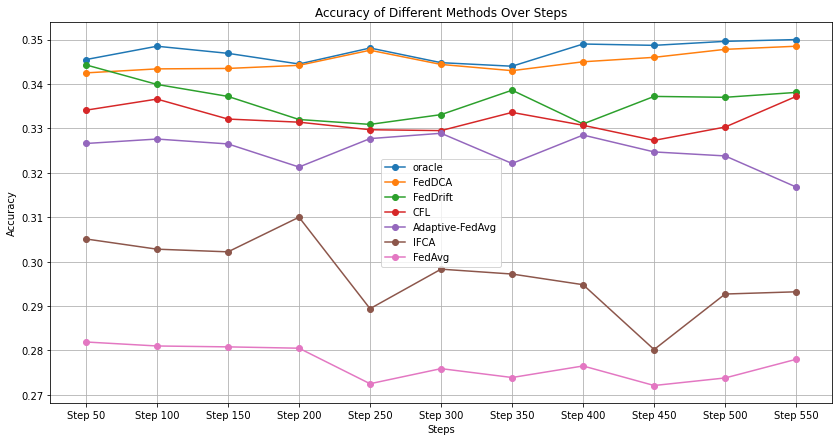

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# The CSV data provided in the message
data = {
    'Method': ['oracle', 'FedDCA', 'FedDrift', 'CFL', 'Adaptive-FedAvg', 'IFCA', 'FedAvg'],
    'Step 50': [0.3455, 0.3425, 0.3443, 0.3341, 0.3266, 0.3051, 0.2819],
    'Step 100': [0.3485, 0.3434, 0.3399, 0.3366, 0.3276, 0.3028, 0.281],
    'Step 150': [0.3469, 0.3435, 0.3372, 0.3321, 0.3265, 0.3022, 0.2808],
    'Step 200': [0.3445, 0.3442, 0.332, 0.3314, 0.3213, 0.31, 0.2805],
    # ... and so on for all the steps provided
    'Step 250': [0.3481, 0.3476, 0.3309, 0.3297, 0.3277, 0.2894, 0.2725],
    'Step 300': [0.3448, 0.3444, 0.3331, 0.3295, 0.3289, 0.2983, 0.2759],
    'Step 350': [0.344, 0.343, 0.3386, 0.3336, 0.3221, 0.2972, 0.2739],
    'Step 400': [0.349, 0.345, 0.331, 0.3307, 0.3285, 0.2948, 0.2765],
    'Step 450': [0.3487, 0.346, 0.3372, 0.3273, 0.3247, 0.2802, 0.2721],
    'Step 500': [0.3496, 0.3478, 0.337, 0.3303, 0.3238, 0.2927, 0.2738],
    'Step 550': [0.35, 0.3485, 0.3381, 0.3372, 0.3168, 0.2932, 0.278],
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Set the 'Method' column as the index to facilitate plotting
df.set_index('Method', inplace=True)

# Transpose the DataFrame to have methods as columns and steps as rows
df = df.T

# Plotting
plt.figure(figsize=(14, 7))
for method in df.columns:
    plt.plot(df.index, df[method], marker='o', label=method)

plt.title('Accuracy of Different Methods Over Steps')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


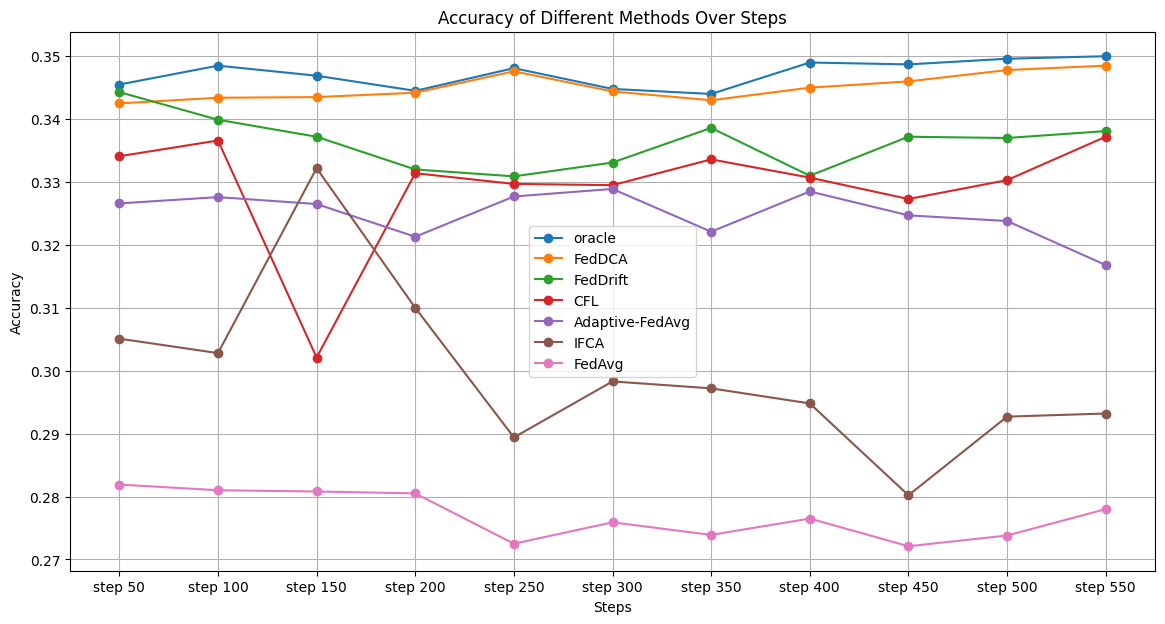

In [15]:
import pandas as pd
df = pd.read_excel('part_results.xlsx',header=0)
df.set_index('Method', inplace=True)
df = df.T
plt.figure(figsize=(14, 7))
for method in df.columns:
    plt.plot(df.index, df[method], marker='o', label=method)

plt.title('Accuracy of Different Methods Over Steps')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


     Step   method1  method2  method3  method4  method5  method6  method7  \
0       2  0.010883   0.0067   0.0169  0.00535   0.0041   0.0066   0.0077   
1       6  0.023217   0.0122   0.0344  0.02190   0.0200   0.0238   0.0073   
2      10  0.021617   0.0063   0.0412  0.02465   0.0233   0.0260   0.0237   
3      14  0.034717   0.0141   0.0537  0.01980   0.0124   0.0272   0.0311   
4      18  0.037883   0.0170   0.0573  0.03335   0.0316   0.0351   0.0355   
..    ...       ...      ...      ...      ...      ...      ...      ...   
796  3186  0.355550   0.3552   0.3559  0.30180   0.2798   0.3238   0.3457   
797  3190  0.353850   0.3534   0.3543  0.30375   0.2810   0.3265   0.3472   
798  3194  0.354250   0.3505   0.3580  0.30030   0.2801   0.3205   0.3434   
799  3198  0.353850   0.3514   0.3563  0.30305   0.2815   0.3246   0.3483   
800  3202  0.357600   0.3545   0.3607  0.30105   0.2809   0.3212   0.3524   

     method8  method9  method10  method11  method12  method13  method14  \


<AxesSubplot:xlabel='Step'>

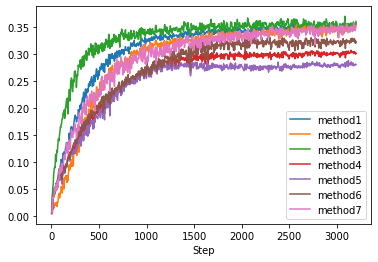

In [1]:
import pandas as pd
df = pd.read_csv('wandb_export_2024-04-19T21_39_12.840+08_00.csv', header=0)
print(df)
df.set_index('Step',inplace=True)
df = df.drop(columns=['method8','method9','method10','method11','method12','method13','method14','method15','method16', 'method17','method18'])
df.plot()

## 模拟step1000时加入概念漂移的数据结果

In [2]:
def simulate_concept_drift(df, drift_step=1000):
    """
    Simulates concept drift and recovery for multiple methods in the dataset at a given step.

    Parameters:
    df (DataFrame): The original dataframe with accuracy columns for different methods.
    drift_step (int): The step at which concept drift occurs.

    Returns:
    DataFrame: The modified dataframe with simulated concept drift and recovery.
    """
    # Copy the original dataframe to not alter the original data
    new_df = df.copy()

    # Iterate over each method column to apply concept drift and recovery
    for method in [f'method{i}' for i in range(1, 8)]:
        # Generate random impact factor and recovery rate within reasonable bounds
        impact_factor = np.random.uniform(0.03, 0.1)  # 10% to 30% drop
        recovery_rate = np.random.uniform(0.001, 0.003)  # Recovery rate per step

        # Apply concept drift at the specified step
        new_df.loc[drift_step:, method] *= (1 - impact_factor)

        # Simulate gradual recovery after the drift
        for i in range(drift_step, len(new_df)):
            recovery = (1 + (i - drift_step) * recovery_rate)
            # Ensure that accuracy does not exceed original value before drift
            new_df.loc[i, method] = min(new_df.loc[i, method] * recovery, df.loc[drift_step, method])
    
    return new_df

<AxesSubplot:xlabel='Step'>

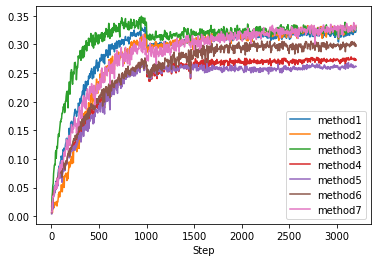

In [3]:
import numpy as np 
df = simulate_concept_drift(df)
df.plot()

<AxesSubplot:xlabel='Step'>

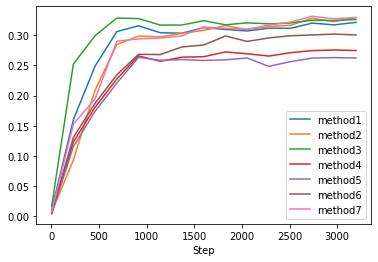

In [6]:
steps = np.arange(2, 3202, 4)

# Calculate the indices for 15 uniformly spaced elements
indices = np.linspace(0, len(steps) - 1, 15, dtype=int)

# Select the steps at these indices
selected_steps = steps[indices]
selected_df = df.loc[selected_steps]
selected_df.plot()

## 更正method名字

<AxesSubplot:xlabel='Step'>

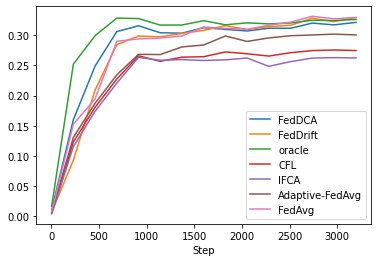

In [11]:
# Define the new method names
methods = ['FedDCA','FedDrift','oracle','CFL','IFCA', 'Adaptive-FedAvg','FedAvg']
# Rename the method columns
selected_df.rename(columns=dict(zip(selected_df.columns[0:], methods)), inplace=True)
selected_df.plot()

ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

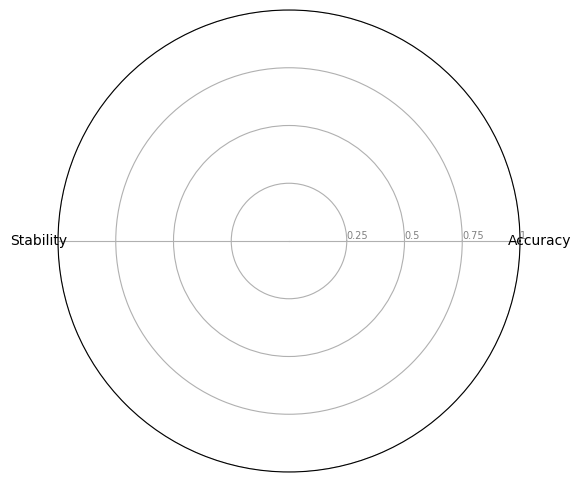

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np

# Assuming the same DataFrame 'df' as above

# Number of variables for radar chart
categories = list(df)[1:-1]  # excluding 'Algorithm' and 'Adjustments'
N = len(categories)

# What will be the angle of each axis in the plot (divide the plot by the number of variables)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # to close the loop

# Radar chart initialization
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75, 1], ["0.25", "0.5", "0.75", "1"], color="grey", size=7)
plt.ylim(0, 1)

# Plot each algorithm on the radar chart
for i, row in df.iterrows():
    data = row.drop('Algorithm').values.flatten().tolist()
    data += data[:1]  # repeat the first value to close the polygon
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=row['Algorithm'])
    ax.fill(angles, data, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


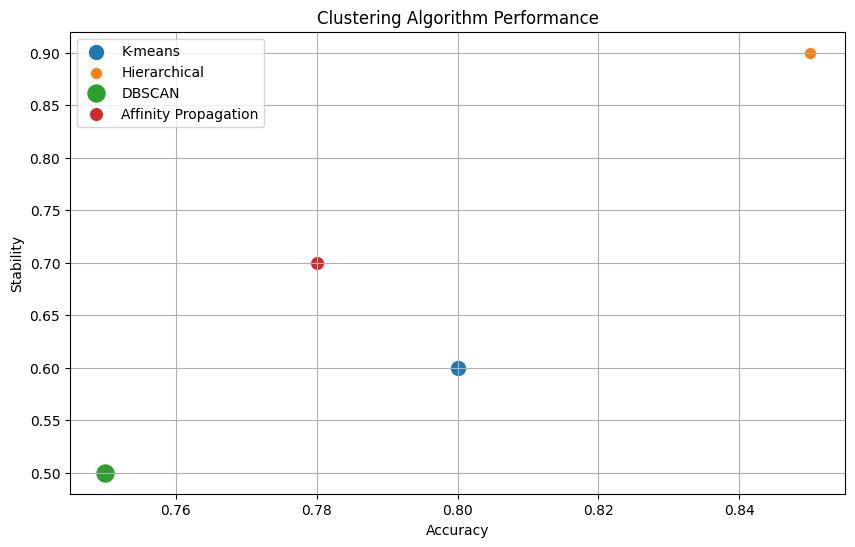

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with clustering algorithm performance metrics
data = {
    'Algorithm': ['K-means', 'Hierarchical', 'DBSCAN', 'Affinity Propagation'],
    'Accuracy': [0.80, 0.85, 0.75, 0.78],
    'Stability': [0.6, 0.9, 0.5, 0.7],
    'Adjustments': [10, 5, 15, 7]
}

df = pd.DataFrame(data)

# Scatter Plot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['Accuracy'], row['Stability'], s=row['Adjustments']*10, label=row['Algorithm'])  # Size based on 'Adjustments'
plt.title('Clustering Algorithm Performance')
plt.xlabel('Accuracy')
plt.ylabel('Stability')
plt.legend()
plt.grid(True)
plt.show()


# t-sne 绘制
This code performs t-SNE on your high-dimensional data and plots the results. The sns.color_palette can be customized to your preference, and you can include additional information such as cluster labels or conditions as hue parameters in sns.scatterplot for a more informative plot. Remember to adjust the perplexity and n_iter parameters based on your dataset size and complexity to optimize the t-SNE results. ​​该代码会对高维数据执行 t-SNE 并绘制结果图。您可以根据自己的喜好定制 sns.color_palette ，还可以在 sns.scatterplot 中加入群集标签或条件等附加信息作为色调参数，以获得信息量更大的图表。切记根据数据集的大小和复杂程度调整 perplexity 和 n_iter 参数，以优化 t-SNE 结果。

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.450242
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.141506
[t-SNE] KL divergence after 300 iterations: 0.372904


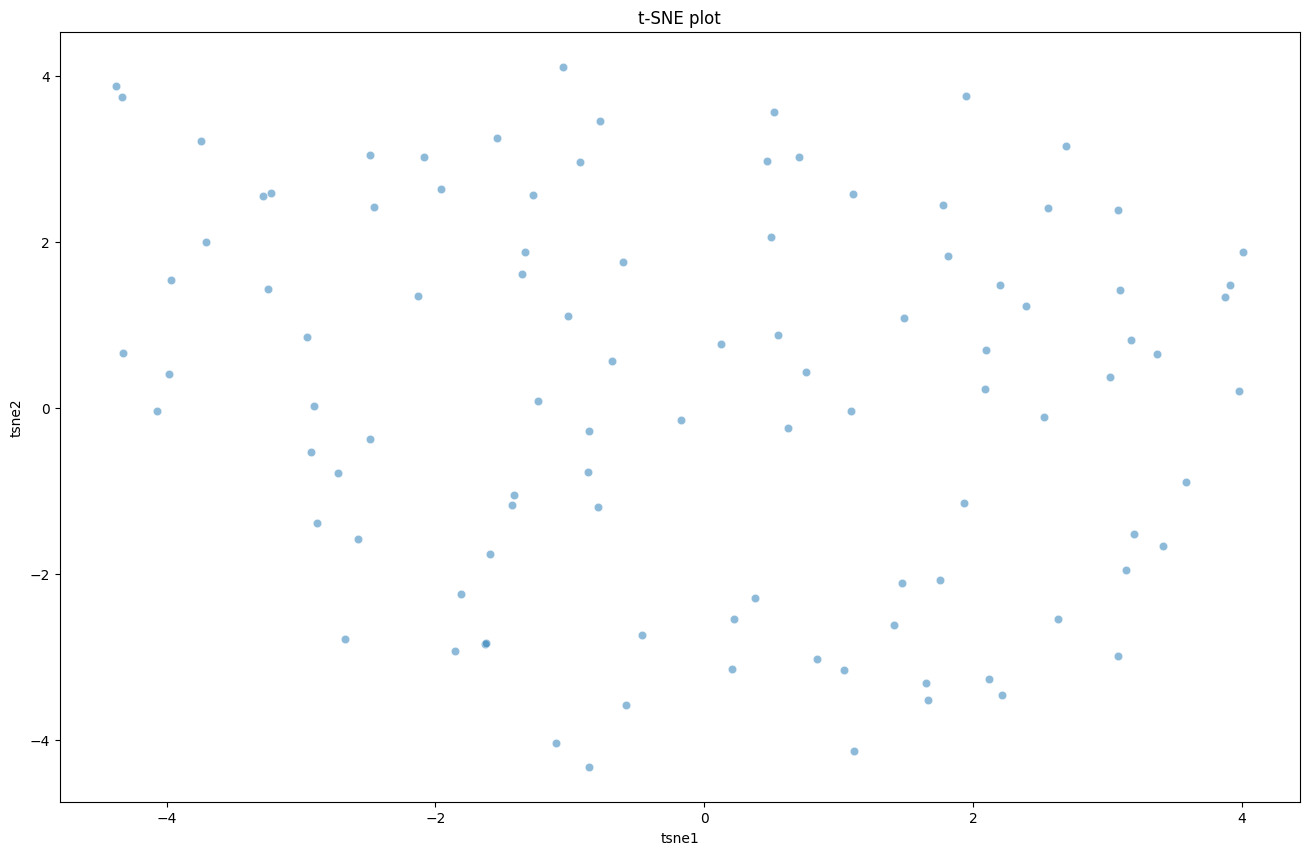

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Let's assume 'data' is a DataFrame containing your high-dimensional data.
# Replace this with your actual data.
# Here we are creating a dummy dataset with 5 features.
np.random.seed(0)
data = np.random.rand(100, 5)  # 100 samples with 5 features each

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

# Create a DataFrame for the 2-dimensional t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Plot the t-SNE output
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    data=tsne_df,
    legend="full",
    alpha=0.5
)
plt.title('t-SNE plot')
plt.show()


C:\Users\91582\AppData\Local\Temp\ipykernel_24868\2959135132.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


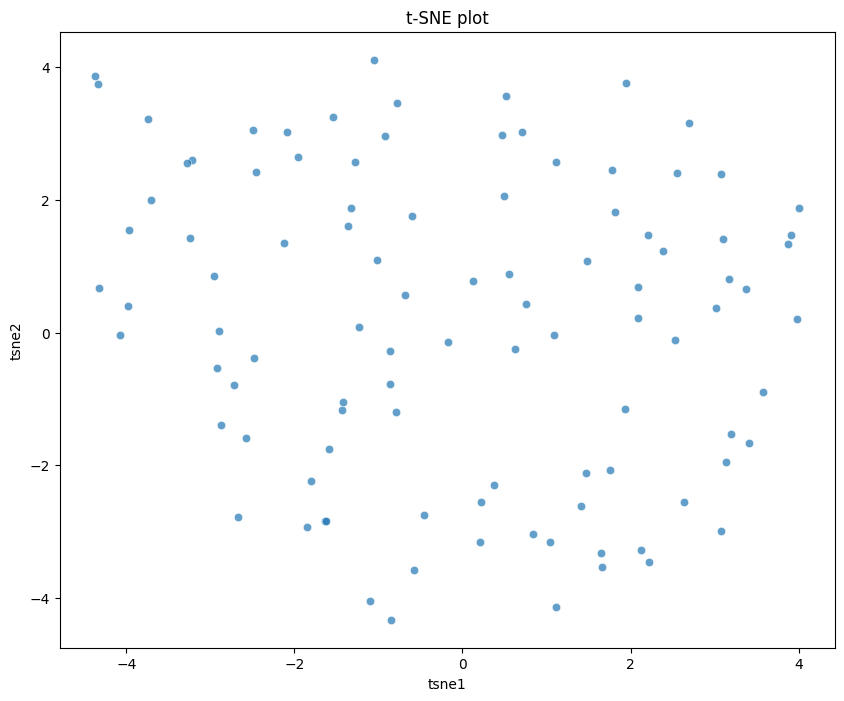

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume 'data' is a DataFrame containing your high-dimensional data.
# Replace the random data generation with your actual dataset.
np.random.seed(0)
data = np.random.rand(100, 5)  # Example: 100 samples with 5 features each

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)

# Create a DataFrame for the 2-dimensional t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

# Plot the t-SNE output
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hsv", 10),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE plot')
plt.show()


# EXPT Results

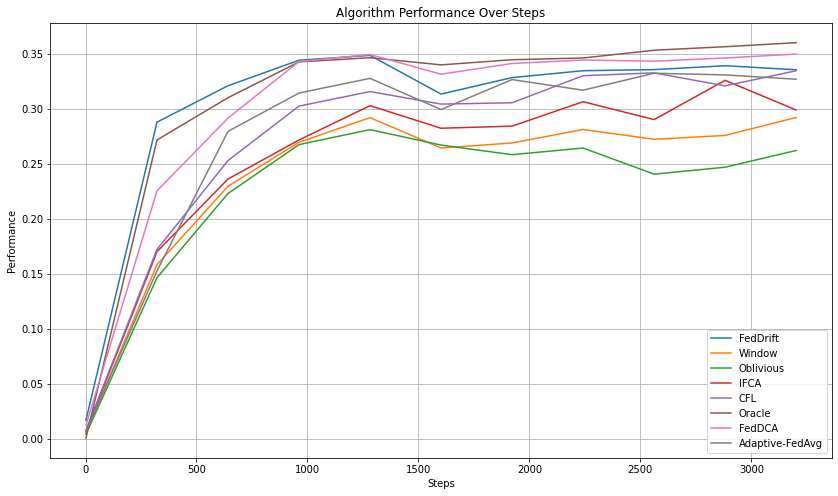

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the uploaded CSV file
file_path = './uniform_sampled_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

# Plot line charts for each algorithm
plt.figure(figsize=(14, 8))

# Define the algorithms to plot
algorithms = ["FedDrift", "Window", "Oblivious", "IFCA", "CFL", "Oracle", "FedDCA", "Adaptive-FedAvg"]

# Plot each algorithm's performance over steps
for algo in algorithms:
    plt.plot(data["Step"], data[algo], label=algo)

# Adding titles and labels
plt.title("Algorithm Performance Over Steps")
plt.xlabel("Steps")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
step_drift = 1600
# Define a smaller window size for instant performance drop calculation

instant_window_size = 10

# Filter data around the immediate drift point
pre_drift_instant_data = data[(data["Step"] >= step_drift - instant_window_size) & (data["Step"] < step_drift)]
post_drift_instant_data = data[(data["Step"] > step_drift) & (data["Step"] <= step_drift + instant_window_size)]

# Calculate mean performance immediately before and after the drift
pre_drift_instant_means = pre_drift_instant_data.mean()
post_drift_instant_means = post_drift_instant_data.mean()

# Calculate the performance drop
performance_drop = pre_drift_instant_means[algorithms] - post_drift_instant_means[algorithms]

# Define a threshold for recovery (e.g., within 95% of the pre-drift performance)
recovery_threshold = 0.95

# Find the step at which each algorithm recovers
recovery_steps = {}
for algo in algorithms:
    pre_drift_mean = pre_drift_instant_means[algo]
    threshold_value = pre_drift_mean * recovery_threshold
    post_drift_recovery = data[data["Step"] > step_drift]
    recovery_step = post_drift_recovery[post_drift_recovery[algo] >= threshold_value]["Step"]
    if not recovery_step.empty:
        recovery_steps[algo] = recovery_step.iloc[0] - step_drift
    else:
        recovery_steps[algo] = float('inf')  # Indicating no recovery within the data range

# Combine the results into a dataframe for comparison
recovery_comparison = pd.DataFrame({
    "Algorithm": algorithms,
    "Performance Drop": performance_drop.values,
    "Recovery Steps": recovery_steps.values()
})
